Extração das variantes LOF para o gene CFTR e elaborar uma representação gráfica da distribuição dessas variantes, os transcritos e consequências. Os dados serão extraídos dos dados genômicos do gnomAD:

Link para a base de dados: https://gnomad.broadinstitute.org/downloads

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_gnomad = r"/content/drive/MyDrive/Colab Notebooks/ESTAGIO LGHM/gnomad.v2.1.1.all_lofs.txt.bgz"
gnomad = pd.read_csv(path_gnomad, compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

_______________________________________________________________________
tabela de variantes por consequência

In [ ]:
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)
#selecionando somente as variantes, consequencias e transcritos que pertencem ao gene CFTR

novas_linhas_ = []
for tupla in all.itertuples():
  nov_linha = []
  variante = tupla[1]
  consequencia = tupla[2]
  for consequenc in consequencia:
    novas_linhas_.append([str(variante), str(consequencia)])

df_var_conseq = pd.DataFrame(novas_linhas_, columns=["Variante", "Consequencia"])

__________________________________________________________________
heatmap e clustermap relacionando as variantes e transcritos através das consequências

In [6]:
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'], [1,2,3,4])
#substituindo os nomes das consequências por inteiros para facilitar o heatmap e clustermap

novas_linhas = []

for tupla in all.itertuples(): #itera entre as linhas do dataframe como tuplas
    variante = tupla[1]
    consequencia = tupla[2]
    transcritos = tupla[3].split(",")
    for transcrito in transcritos:
        novas_linhas.append([variante, transcrito, consequencia])

df = pd.DataFrame(novas_linhas, columns=["Variante", "Transcrito", "Consequencia"])

df2 = df.pivot_table(index = "Variante", columns="Transcrito",
                      values="Consequencia", fill_value=0).T #df2 relaciona variante e transcrito através de uma consequência
df2.to_csv("Consequences.csv")

____________________________________________________________________
heatmap

In [7]:
unique_variantes = df['Variante'].unique()
unique_transc = df['Transcrito'].unique()

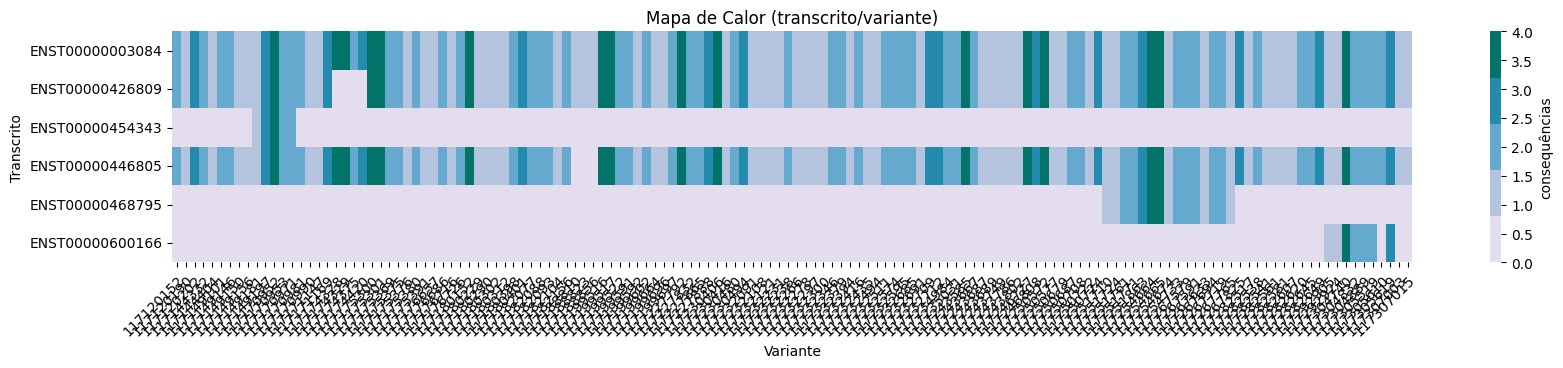

In [8]:
fig, ax = plt.subplots(figsize=(20, 3))
cmap = sns.color_palette("PuBuGn", 5)

sns.heatmap(df2, vmin=0, vmax = 4,
            cmap = cmap, cbar_kws={'label': 'consequências'},
            xticklabels = unique_variantes,
            yticklabels = unique_transc)

plt.setp(ax.get_xticklabels(),
         rotation=45,
         ha="right",
         rotation_mode="anchor")
ax.set_title("Mapa de Calor (transcrito/variante)")
plt.show()

______________________________________________________________
clustermap

In [9]:
metrica = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
           'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
           'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
#Distance metric to use for the data

metodo = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #Linkage method to use for calculating clusters

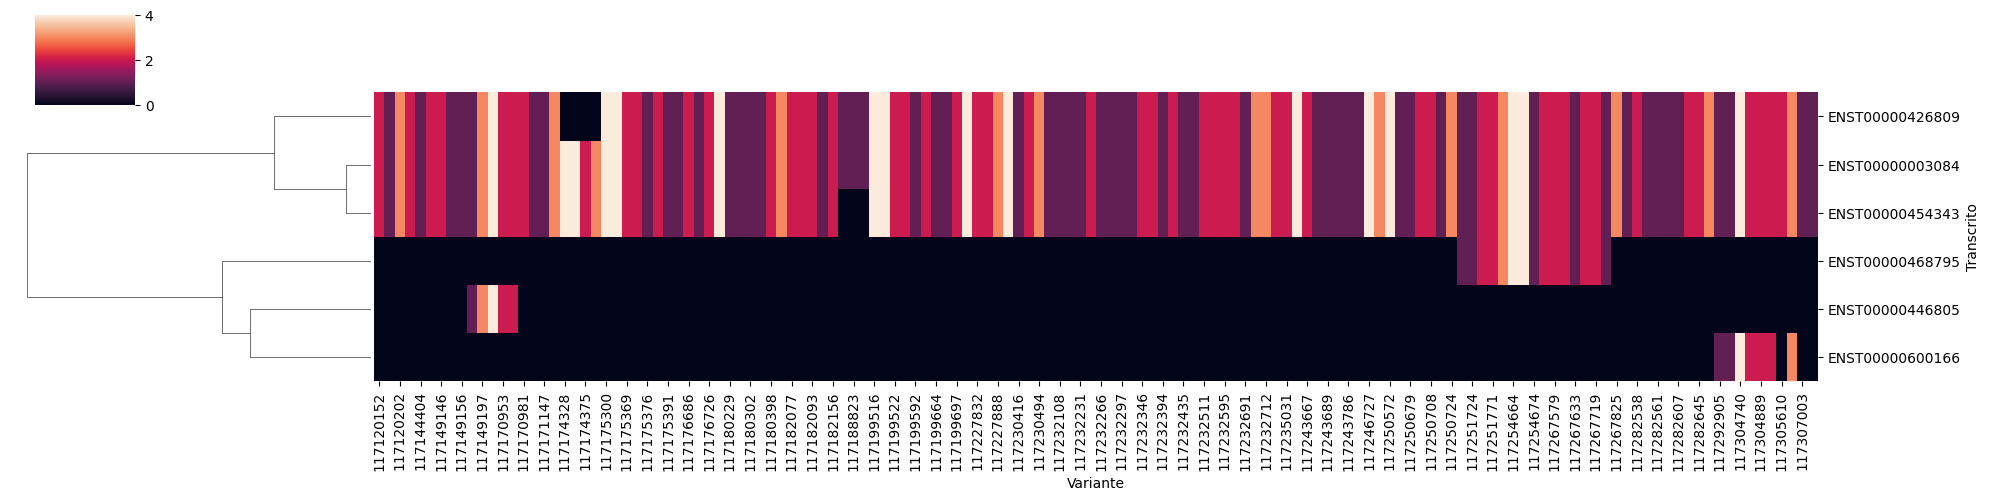

In [16]:
sns.clustermap(df2,
               method = 'average',
               metric = 'euclidean',
               row_cluster = True,
               col_cluster = False,
               figsize = (20,5))
plt.show()

_________________________________________________________________________
